[*********************100%%**********************]  1 of 1 completed
C:\Users\adama\AppData\Local\Temp\ipykernel_17444\1257708324.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda.fillna(method='ffill', inplace=True)
C:\Users\adama\AppData\Local\Temp\ipykernel_17444\1257708324.py:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and

               Open    High      Low    Close  Adj Close     Volume
Date                                                               
2010-01-04  0.46275  0.4655  0.45275  0.46225   0.423988  800204000
2010-01-05  0.46050  0.4740  0.46050  0.46900   0.430180  728648000
2010-01-06  0.46875  0.4730  0.46425  0.47200   0.432931  649168000
2010-01-07  0.46950  0.4715  0.45925  0.46275   0.424447  547792000
2010-01-08  0.45900  0.4670  0.45625  0.46375   0.425364  478168000
Mean Squared Error: 0.07424325849287416
R-squared: 0.9985751258494078


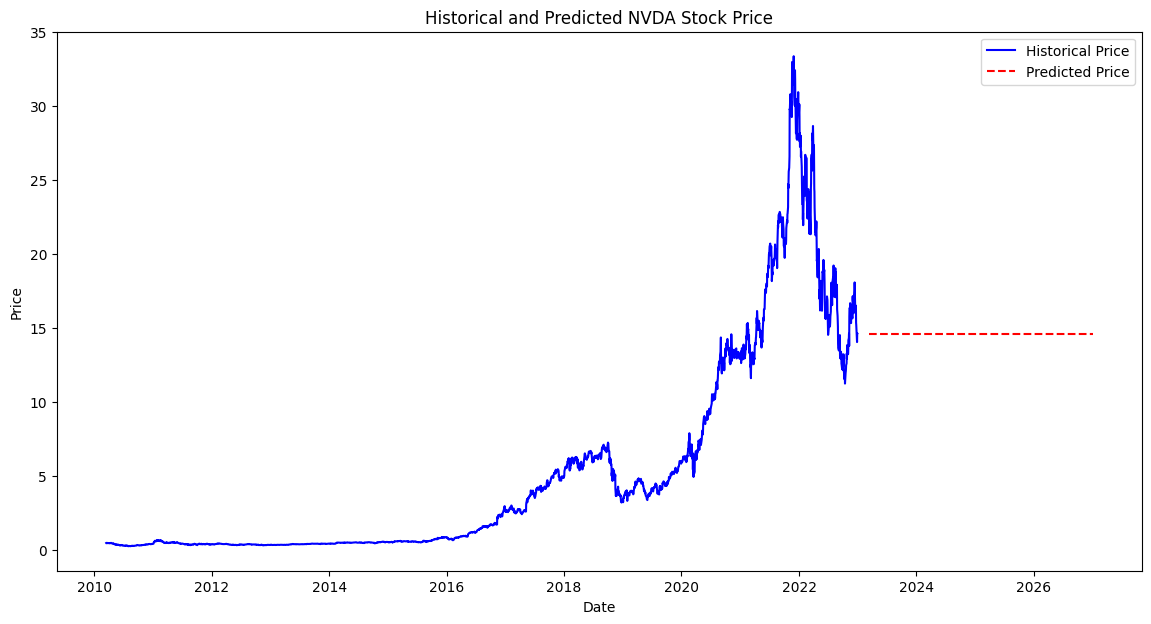

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

nvda = yf.download('NVDA', start='2010-01-01', end='2023-01-01')
print(nvda.head())

nvda.fillna(method='ffill', inplace=True)
nvda['MA20'] = nvda['Close'].rolling(window=20).mean()
nvda['MA50'] = nvda['Close'].rolling(window=50).mean()
nvda.dropna(inplace=True)

X = nvda[['Close', 'MA20', 'MA50']]
y = nvda['Close'].shift(-1)
X = X[:-1]
y = y[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

future_dates = pd.date_range(start='2023-01-02', end='2027-01-01', freq='B')
future_df = pd.DataFrame(index=future_dates)

last_close = nvda['Close'].iloc[-1]
future_df['Close'] = np.nan
future_df['Close'].iloc[0] = last_close

for i in range(1, len(future_df)):
    future_df['Close'].iloc[i] = future_df['Close'].iloc[i-1] 

future_df['MA20'] = future_df['Close'].rolling(window=20).mean()
future_df['MA50'] = future_df['Close'].rolling(window=50).mean()
future_df.dropna(inplace=True)

future_X = future_df[['Close', 'MA20', 'MA50']].values
future_X_scaled = scaler.transform(future_X)

future_predictions = model.predict(future_X_scaled)
future_df['Predicted_Close'] = future_predictions

plt.figure(figsize=(14, 7))
plt.plot(nvda.index, nvda['Close'], label='Historical Price', color='blue')
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted NVDA Stock Price')
plt.legend()
plt.show()
